In [1]:
%pip install feets
import feets
import os
import math
import numpy as np
import argparse
from astropy.table import Table, Column, join
import sys
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
import pickle
import matplotlib.pylab as pylab
from astropy.table import Table, Column, join
import glob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.4/83.4 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for feets: filename=feets-0.4-py3-none-any.whl size=141059 sha256=c51258c0d40000dbdc6d9332fbf7f581f613e4083b42ad07e5843e385f0a2f94
  Stored in directory: /root/.cache/pip/wheels/6a/18/76/926b679c82b11c49ff99a66ed24f4a06c88787332c351ca786
Successfully built feets


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
## get light curves

## folder - LC_set1_files (columns: hjd, mag, emag)
## folder - LC_set2_files (columns: mjd, mag, emag, uplim)
path = '/content/drive/MyDrive/ISYA_ML/Data/LC_set2_files'


In [4]:
file_list = os.listdir(path)
file_list

['DWF190640.084-642103.170_160802',
 'DWF064649.171-505938.667_150117',
 'DWF190307.977-642804.341_160726',
 'DWF041033.616-541751.000_151221',
 'DWF191332.266-642337.321_160726',
 'DWF102620.795-344510.531_170207',
 'DWF011155.577-754206.269_151222',
 'DWF185931.059-644311.623_160729',
 'DWF212528.542-661325.125_160726',
 'DWF191030.512-650752.781_160803',
 'DWF102807.796-355414.891_170205',
 'DWF060201.422-610614.882_150114',
 'DWF030449.587-545831.168_151219',
 'DWF011120.701-752928.266_151218',
 'DWF103416.611-351226.139_170205',
 'DWF064723.540-513112.560_170206',
 'DWF191105.224-643519.354_160804',
 'DWF190304.230-650400.343_160803',
 'DWF113432.382-855241.829_180607',
 'DWF191030.512-650752.781_160805',
 'DWF040541.498-553457.866_150114',
 'DWF055708.927-615207.896_170207',
 'DWF030225.574-545707.456_151218',
 'DWF100432.284-801436.833_180609',
 'DWF040239.269-545106.763_150116',
 'DWF030218.284-550124.597_151222',
 'DWF060414.193-611314.069_150116',
 'DWF100233.384-801349.399_1

DWF011155.577-754206.269_151222


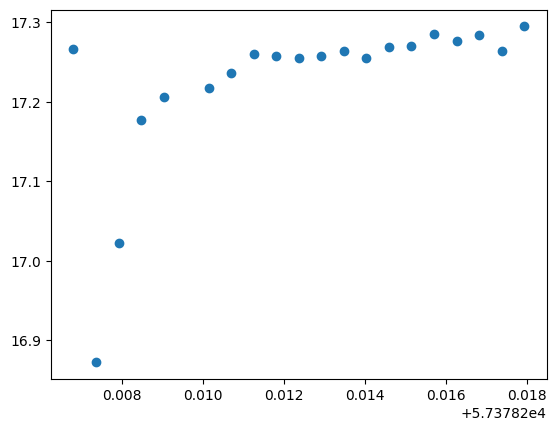

In [5]:
## list at a test lightcurve

num = 6
print(file_list[num])

hjd, mag, emag, uplim = np.loadtxt(path+'/'+file_list[num], unpack = True, skiprows=1)
plt.scatter(hjd, mag)


# What features do you think could describe the light curves for ML?

Papers to consider reading:

https://ui.adsabs.harvard.edu/abs/2021MNRAS.506.2089W/abstract
https://ui.adsabs.harvard.edu/abs/2011ApJ...735...68K/abstract
https://ui.adsabs.harvard.edu/abs/2016A%26A...587A..18K/abstract
https://ui.adsabs.harvard.edu/abs/2015arXiv150600010N/abstract
https://ui.adsabs.harvard.edu/abs/2013ApJ...777...83P/abstract

Types of features which have been used for light curves:

Autocor_length,
Beyond1Std,
CAR_sigma,
CAR_mean,
CAR_tau,
Con,
Eta_e,
LinearTrend,
MaxSlope,
Mean,
Meanvariance,
MedianAbsDev,
MedianBRP,
PairSlopeTrend,
PercentAmplitude,
Q31,
Rcs,
Skew,
SlottedA_length,
SmallKurtosis,
Std,
StetsonK_AC,
Amplitudes,
VariabilityIndex,
hl_ratio,
amp1_val,
amp_2_1_ratio,
amp_3_1_ratio,
phase_2_1_ratio,
phase_3_1_ratio,


In [6]:
used_lcs = []
filenames = []
LC_name = []
Autocor_length = []
Beyond1Std = []
CAR_sigma = []
CAR_mean = []
CAR_tau =[]
Con =[]
Eta_e = []
LinearTrend = []
MaxSlope =[]
Mean = []
Meanvariance = []
MedianAbsDev =[]
MedianBRP =[]
PairSlopeTrend =[]
PercentAmplitude =[]
Q31 =[]
Rcs =[]
Skew =[]
SlottedA_length =[]
SmallKurtosis =[]
Std = []
StetsonK_AC = []
Amplitudes = []
VariabilityIndex = []
hl_ratio = []
amp1_val = []
amp_2_1_ratio = []
amp_3_1_ratio = []
phase_2_1_ratio = []
phase_3_1_ratio = []

for filename in file_list:
        if filename.startswith('DWF'):
            try:
                hjd, mag, emag, uplim = np.loadtxt(path + filename, unpack = True, skiprows=1)
            except:
                print('FILE EMPTY)')
            sum_mag = np.sum(mag)
            # We don't won't to work with light curves with no values so we
            # should filter them out before we get the features
            if sum_mag == 0:
                lc_with_only_zeros.append(filename)
            elif sum_mag != 0:
                used_lcs.append(filename)
            clean_hjd = []
            clean_mag = []
            clean_emag = []
            # Now we want to clean the light curves to remove any none numbers (someones nan's will be in the data)
            for l,m,n in zip(hjd,mag, emag):
                if m != 0:
                    if m != 0:
                        clean_hjd.append(l)
                        clean_mag.append(m)
                        clean_emag.append(n)
                    elif m != float:
                        pass

            # ---  The feets package needs at least 3 data points
            if len(clean_hjd) > 3:
                lc = np.array([clean_mag, clean_hjd, clean_emag])
                fs=feets.FeatureSpace(only=['Autocor_length', 'Beyond1Std', 'CAR_sigma', 'CAR_mean',
                                            'CAR_tau', 'Con', 'LinearTrend', 'MaxSlope',
                                            'Mean', 'Meanvariance', 'MedianAbsDev', 'MedianBRP',
                                            'PairSlopeTrend', 'PercentAmplitude', 'Q31', 'Rcs', 'Skew',
                                            'SlottedA_length', 'SmallKurtosis', 'Std',
                                            'StetsonK_AC' ])

                features, values = fs.extract(*lc)
                print(features, values)
                results = dict(zip(features,values))
                print(results['Autocor_length'])
                filenames.append(filename)
                Autocor_length.append(results['Autocor_length'])
                Beyond1Std.append(results['Beyond1Std'])
                CAR_sigma.append(results['CAR_sigma'])
                CAR_mean.append(results['CAR_mean'])
                CAR_tau.append(results['CAR_tau'])
                Con.append(results['Con'])
                LinearTrend.append(results['LinearTrend'])
                MaxSlope.append(results['MaxSlope'])
                Mean.append(results['Mean'])
                Meanvariance.append(results['Meanvariance'])
                MedianAbsDev.append(results['MedianAbsDev'])
                MedianBRP.append(results['MedianBRP'])
                PairSlopeTrend.append(results['PairSlopeTrend'])
                PercentAmplitude.append(results['PercentAmplitude'])
                Q31.append(results['Q31'])
                Rcs.append(results['Rcs'])
                Skew.append(results['Skew'])
                SlottedA_length.append(results['SlottedA_length'])
                SmallKurtosis.append(results['SmallKurtosis'])
                Std.append(results['Std'])
                StetsonK_AC.append(results['StetsonK_AC'])


            else:
                print('Not enough data points')
    #put all into a mega table with each row representing a different light curve
feature_table = Table()
feature_table['LC_name'] = filenames
feature_table['Autocor_length'] = Autocor_length
feature_table['Beyond1Std'] = Beyond1Std
feature_table['CAR_sigma'] = CAR_sigma
feature_table['CAR_mean'] = CAR_mean
feature_table['CAR_tau'] = CAR_tau
feature_table['Con'] = Con
feature_table['LinearTrend'] = LinearTrend
feature_table['MaxSlope'] = MaxSlope
feature_table['Mean'] =Mean
feature_table['Meanvariance'] =Meanvariance
feature_table['MedianAbsDev'] =MedianAbsDev
feature_table['MedianBRP'] =MedianBRP
feature_table['PairSlopeTrend'] =PairSlopeTrend
feature_table['PercentAmplitude'] =PercentAmplitude
feature_table['Q31'] =Q31
feature_table['Rcs'] =Rcs
feature_table['Skew'] =Skew
feature_table['SlottedA_length'] =SlottedA_length
feature_table['SmallKurtosis'] =SmallKurtosis
feature_table['Std'] =Std
feature_table['StetsonK_AC'] =StetsonK_AC
output =path+'/features_set.csv'
df = feature_table.to_pandas()
df = df.replace(np.nan, 0)
df.to_csv(output)


FILE EMPTY)
['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 5.00000000e+00  4.50000000e-01  1.14756425e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  2.13607621e-02             inf
  5.73782125e+04  5.91106183e-08  2.77913500e-03  2.00000000e-01
  6.33333333e-01  1.01909849e-07  5.41840251e-03  4.30441894e-01
 -9.61455022e-02             nan -9.15541445e-01  3.39166162e-03
             nan]
5.0


/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:256: RuntimeWarning: invali

FILE EMPTY)
['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 5.00000000e+00  4.50000000e-01  1.14756425e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  2.13607621e-02             inf
  5.73782125e+04  5.91106183e-08  2.77913500e-03  2.00000000e-01
  6.33333333e-01  1.01909849e-07  5.41840251e-03  4.30441894e-01
 -9.61455022e-02             nan -9.15541445e-01  3.39166162e-03
             nan]
5.0


/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])


FILE EMPTY)


/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:256: RuntimeWarning: invali

['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 5.00000000e+00  4.50000000e-01  1.14756425e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  2.13607621e-02             inf
  5.73782125e+04  5.91106183e-08  2.77913500e-03  2.00000000e-01
  6.33333333e-01  1.01909849e-07  5.41840251e-03  4.30441894e-01
 -9.61455022e-02             nan -9.15541445e-01  3.39166162e-03
             nan]
5.0
FILE EMPTY)


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_stetson.py:247: RuntimeWarning: divide by zero encountered in double_scala

['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 5.00000000e+00  4.50000000e-01  1.14756425e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  2.13607621e-02             inf
  5.73782125e+04  5.91106183e-08  2.77913500e-03  2.00000000e-01
  6.33333333e-01  1.01909849e-07  5.41840251e-03  4.30441894e-01
 -9.61455022e-02             nan -9.15541445e-01  3.39166162e-03
             nan]
5.0
FILE EMPTY)


/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:256: RuntimeWarning: invali

['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 5.00000000e+00  4.50000000e-01  1.14756425e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  2.13607621e-02             inf
  5.73782125e+04  5.91106183e-08  2.77913500e-03  2.00000000e-01
  6.33333333e-01  1.01909849e-07  5.41840251e-03  4.30441894e-01
 -9.61455022e-02             nan -9.15541445e-01  3.39166162e-03
             nan]
5.0
FILE EMPTY)
['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 5.00000000e+00  4.50000000e-01  1.14756425e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  2.13607621e-02             i

/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:256: RuntimeWarning: invali

['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 5.00000000e+00  4.50000000e-01  1.14756425e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  2.13607621e-02             inf
  5.73782125e+04  5.91106183e-08  2.77913500e-03  2.00000000e-01
  6.33333333e-01  1.01909849e-07  5.41840251e-03  4.30441894e-01
 -9.61455022e-02             nan -9.15541445e-01  3.39166162e-03
             nan]
5.0
FILE EMPTY)
['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 5.00000000e+00  4.50000000e-01  1.14756425e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  2.13607621e-02             i

/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:256: RuntimeWarning: invali

['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 5.00000000e+00  4.50000000e-01  1.14756425e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  2.13607621e-02             inf
  5.73782125e+04  5.91106183e-08  2.77913500e-03  2.00000000e-01
  6.33333333e-01  1.01909849e-07  5.41840251e-03  4.30441894e-01
 -9.61455022e-02             nan -9.15541445e-01  3.39166162e-03
             nan]
5.0
FILE EMPTY)
['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 5.00000000e+00  4.50000000e-01  1.14756425e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  2.13607621e-02             i

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_stetson.py:247: RuntimeWarning: divide by zero encountered in double_scala

['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 5.00000000e+00  4.50000000e-01  1.14756425e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  2.13607621e-02             inf
  5.73782125e+04  5.91106183e-08  2.77913500e-03  2.00000000e-01
  6.33333333e-01  1.01909849e-07  5.41840251e-03  4.30441894e-01
 -9.61455022e-02             nan -9.15541445e-01  3.39166162e-03
             nan]
5.0
FILE EMPTY)
['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 5.00000000e+00  4.50000000e-01  1.14756425e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  2.13607621e-02             i

/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:256: RuntimeWarning: invali

['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 5.00000000e+00  4.50000000e-01  1.14756425e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  2.13607621e-02             inf
  5.73782125e+04  5.91106183e-08  2.77913500e-03  2.00000000e-01
  6.33333333e-01  1.01909849e-07  5.41840251e-03  4.30441894e-01
 -9.61455022e-02             nan -9.15541445e-01  3.39166162e-03
             nan]
5.0
FILE EMPTY)
['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 5.00000000e+00  4.50000000e-01  1.14756425e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  2.13607621e-02             i

/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:256: RuntimeWarning: invali

['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 5.00000000e+00  4.50000000e-01  1.14756425e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  2.13607621e-02             inf
  5.73782125e+04  5.91106183e-08  2.77913500e-03  2.00000000e-01
  6.33333333e-01  1.01909849e-07  5.41840251e-03  4.30441894e-01
 -9.61455022e-02             nan -9.15541445e-01  3.39166162e-03
             nan]
5.0
FILE EMPTY)
['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 5.00000000e+00  4.50000000e-01  1.14756425e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  2.13607621e-02             i

/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:256: RuntimeWarning: invali

['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 5.00000000e+00  4.50000000e-01  1.14756425e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  2.13607621e-02             inf
  5.73782125e+04  5.91106183e-08  2.77913500e-03  2.00000000e-01
  6.33333333e-01  1.01909849e-07  5.41840251e-03  4.30441894e-01
 -9.61455022e-02             nan -9.15541445e-01  3.39166162e-03
             nan]
5.0
FILE EMPTY)
['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 5.00000000e+00  4.50000000e-01  1.14756425e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  2.13607621e-02             i

/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:256: RuntimeWarning: invali

['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 5.00000000e+00  4.50000000e-01  1.14756425e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  2.13607621e-02             inf
  5.73782125e+04  5.91106183e-08  2.77913500e-03  2.00000000e-01
  6.33333333e-01  1.01909849e-07  5.41840251e-03  4.30441894e-01
 -9.61455022e-02             nan -9.15541445e-01  3.39166162e-03
             nan]
5.0
FILE EMPTY)
['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 5.00000000e+00  4.50000000e-01  1.14756425e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  2.13607621e-02             i

/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:256: RuntimeWarning: invali

['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 5.00000000e+00  4.50000000e-01  1.14756425e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  2.13607621e-02             inf
  5.73782125e+04  5.91106183e-08  2.77913500e-03  2.00000000e-01
  6.33333333e-01  1.01909849e-07  5.41840251e-03  4.30441894e-01
 -9.61455022e-02             nan -9.15541445e-01  3.39166162e-03
             nan]
5.0
FILE EMPTY)
['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 5.00000000e+00  4.50000000e-01  1.14756425e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  2.13607621e-02             i

/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:256: RuntimeWarning: invali

['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 5.00000000e+00  4.50000000e-01  1.14756425e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  2.13607621e-02             inf
  5.73782125e+04  5.91106183e-08  2.77913500e-03  2.00000000e-01
  6.33333333e-01  1.01909849e-07  5.41840251e-03  4.30441894e-01
 -9.61455022e-02             nan -9.15541445e-01  3.39166162e-03
             nan]
5.0
FILE EMPTY)
['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 5.00000000e+00  4.50000000e-01  1.14756425e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  2.13607621e-02             i

/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:256: RuntimeWarning: invali

['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 5.00000000e+00  4.50000000e-01  1.14756425e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  2.13607621e-02             inf
  5.73782125e+04  5.91106183e-08  2.77913500e-03  2.00000000e-01
  6.33333333e-01  1.01909849e-07  5.41840251e-03  4.30441894e-01
 -9.61455022e-02             nan -9.15541445e-01  3.39166162e-03
             nan]
5.0
FILE EMPTY)
['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 5.00000000e+00  4.50000000e-01  1.14756425e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  2.13607621e-02             i

/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:256: RuntimeWarning: invali

['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 5.00000000e+00  4.50000000e-01  1.14756425e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  2.13607621e-02             inf
  5.73782125e+04  5.91106183e-08  2.77913500e-03  2.00000000e-01
  6.33333333e-01  1.01909849e-07  5.41840251e-03  4.30441894e-01
 -9.61455022e-02             nan -9.15541445e-01  3.39166162e-03
             nan]
5.0
FILE EMPTY)
['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 5.00000000e+00  4.50000000e-01  1.14756425e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  2.13607621e-02             i

/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:256: RuntimeWarning: invali

['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 5.00000000e+00  4.50000000e-01  1.14756425e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  2.13607621e-02             inf
  5.73782125e+04  5.91106183e-08  2.77913500e-03  2.00000000e-01
  6.33333333e-01  1.01909849e-07  5.41840251e-03  4.30441894e-01
 -9.61455022e-02             nan -9.15541445e-01  3.39166162e-03
             nan]
5.0
FILE EMPTY)
['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 5.00000000e+00  4.50000000e-01  1.14756425e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  2.13607621e-02             i

/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:256: RuntimeWarning: invali

FILE EMPTY)
['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 5.00000000e+00  4.50000000e-01  1.14756425e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  2.13607621e-02             inf
  5.73782125e+04  5.91106183e-08  2.77913500e-03  2.00000000e-01
  6.33333333e-01  1.01909849e-07  5.41840251e-03  4.30441894e-01
 -9.61455022e-02             nan -9.15541445e-01  3.39166162e-03
             nan]
5.0
FILE EMPTY)
['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 5.00000000e+00  4.50000000e-01  1.14756425e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  2.13607621e-02  

/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:256: RuntimeWarning: invali

['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 5.00000000e+00  4.50000000e-01  1.14756425e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  2.13607621e-02             inf
  5.73782125e+04  5.91106183e-08  2.77913500e-03  2.00000000e-01
  6.33333333e-01  1.01909849e-07  5.41840251e-03  4.30441894e-01
 -9.61455022e-02             nan -9.15541445e-01  3.39166162e-03
             nan]
5.0
FILE EMPTY)
['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 5.00000000e+00  4.50000000e-01  1.14756425e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  2.13607621e-02             i

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_stetson.py:247: RuntimeWarning: divide by zero encountered in double_scala

['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 5.00000000e+00  4.50000000e-01  1.14756425e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  2.13607621e-02             inf
  5.73782125e+04  5.91106183e-08  2.77913500e-03  2.00000000e-01
  6.33333333e-01  1.01909849e-07  5.41840251e-03  4.30441894e-01
 -9.61455022e-02             nan -9.15541445e-01  3.39166162e-03
             nan]
5.0
FILE EMPTY)
['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 5.00000000e+00  4.50000000e-01  1.14756425e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  2.13607621e-02             i

/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:256: RuntimeWarning: invali

['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 5.00000000e+00  4.50000000e-01  1.14756425e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  2.13607621e-02             inf
  5.73782125e+04  5.91106183e-08  2.77913500e-03  2.00000000e-01
  6.33333333e-01  1.01909849e-07  5.41840251e-03  4.30441894e-01
 -9.61455022e-02             nan -9.15541445e-01  3.39166162e-03
             nan]
5.0
FILE EMPTY)
['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 5.00000000e+00  4.50000000e-01  1.14756425e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  2.13607621e-02             i

/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:256: RuntimeWarning: invali

['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 5.00000000e+00  4.50000000e-01  1.14756425e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  2.13607621e-02             inf
  5.73782125e+04  5.91106183e-08  2.77913500e-03  2.00000000e-01
  6.33333333e-01  1.01909849e-07  5.41840251e-03  4.30441894e-01
 -9.61455022e-02             nan -9.15541445e-01  3.39166162e-03
             nan]
5.0
FILE EMPTY)
['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 5.00000000e+00  4.50000000e-01  1.14756425e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  2.13607621e-02             i

/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])
/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:222: RuntimeWa

['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 5.00000000e+00  4.50000000e-01  1.14756425e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  2.13607621e-02             inf
  5.73782125e+04  5.91106183e-08  2.77913500e-03  2.00000000e-01
  6.33333333e-01  1.01909849e-07  5.41840251e-03  4.30441894e-01
 -9.61455022e-02             nan -9.15541445e-01  3.39166162e-03
             nan]
5.0
FILE EMPTY)
['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 5.00000000e+00  4.50000000e-01  1.14756425e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  2.13607621e-02             i

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_stetson.py:247: RuntimeWarning: divide by zero encountered in double_scala

['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 5.00000000e+00  4.50000000e-01  1.14756425e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  2.13607621e-02             inf
  5.73782125e+04  5.91106183e-08  2.77913500e-03  2.00000000e-01
  6.33333333e-01  1.01909849e-07  5.41840251e-03  4.30441894e-01
 -9.61455022e-02             nan -9.15541445e-01  3.39166162e-03
             nan]
5.0
FILE EMPTY)
['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 5.00000000e+00  4.50000000e-01  1.14756425e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  2.13607621e-02             i

/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])
/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:222: RuntimeWa

['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 5.00000000e+00  4.50000000e-01  1.14756425e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  2.13607621e-02             inf
  5.73782125e+04  5.91106183e-08  2.77913500e-03  2.00000000e-01
  6.33333333e-01  1.01909849e-07  5.41840251e-03  4.30441894e-01
 -9.61455022e-02             nan -9.15541445e-01  3.39166162e-03
             nan]
5.0
FILE EMPTY)
['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 5.00000000e+00  4.50000000e-01  1.14756425e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  2.13607621e-02             i

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_stetson.py:247: RuntimeWarning: divide by zero encountered in double_scala

FILE EMPTY)
['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 5.00000000e+00  4.50000000e-01  1.14756425e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  2.13607621e-02             inf
  5.73782125e+04  5.91106183e-08  2.77913500e-03  2.00000000e-01
  6.33333333e-01  1.01909849e-07  5.41840251e-03  4.30441894e-01
 -9.61455022e-02             nan -9.15541445e-01  3.39166162e-03
             nan]
5.0
FILE EMPTY)
['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 5.00000000e+00  4.50000000e-01  1.14756425e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  2.13607621e-02  

/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:256: RuntimeWarning: invali

['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 5.00000000e+00  4.50000000e-01  1.14756425e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  2.13607621e-02             inf
  5.73782125e+04  5.91106183e-08  2.77913500e-03  2.00000000e-01
  6.33333333e-01  1.01909849e-07  5.41840251e-03  4.30441894e-01
 -9.61455022e-02             nan -9.15541445e-01  3.39166162e-03
             nan]
5.0
FILE EMPTY)
['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 5.00000000e+00  4.50000000e-01  1.14756425e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  2.13607621e-02             i

/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:256: RuntimeWarning: invali

['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 5.00000000e+00  4.50000000e-01  1.14756425e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  2.13607621e-02             inf
  5.73782125e+04  5.91106183e-08  2.77913500e-03  2.00000000e-01
  6.33333333e-01  1.01909849e-07  5.41840251e-03  4.30441894e-01
 -9.61455022e-02             nan -9.15541445e-01  3.39166162e-03
             nan]
5.0
FILE EMPTY)
['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 5.00000000e+00  4.50000000e-01  1.14756425e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  2.13607621e-02             i

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_stetson.py:247: RuntimeWarning: divide by zero encountered in double_scala

['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 5.00000000e+00  4.50000000e-01  1.14756425e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  2.13607621e-02             inf
  5.73782125e+04  5.91106183e-08  2.77913500e-03  2.00000000e-01
  6.33333333e-01  1.01909849e-07  5.41840251e-03  4.30441894e-01
 -9.61455022e-02             nan -9.15541445e-01  3.39166162e-03
             nan]
5.0
FILE EMPTY)
['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 5.00000000e+00  4.50000000e-01  1.14756425e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  2.13607621e-02             i

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_stetson.py:247: RuntimeWarning: divide by zero encountered in double_scala

['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 5.00000000e+00  4.50000000e-01  1.14756425e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  2.13607621e-02             inf
  5.73782125e+04  5.91106183e-08  2.77913500e-03  2.00000000e-01
  6.33333333e-01  1.01909849e-07  5.41840251e-03  4.30441894e-01
 -9.61455022e-02             nan -9.15541445e-01  3.39166162e-03
             nan]
5.0
FILE EMPTY)
['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 5.00000000e+00  4.50000000e-01  1.14756425e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  2.13607621e-02             i

/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])
/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:222: RuntimeWa

['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 5.00000000e+00  4.50000000e-01  1.14756425e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  2.13607621e-02             inf
  5.73782125e+04  5.91106183e-08  2.77913500e-03  2.00000000e-01
  6.33333333e-01  1.01909849e-07  5.41840251e-03  4.30441894e-01
 -9.61455022e-02             nan -9.15541445e-01  3.39166162e-03
             nan]
5.0
FILE EMPTY)
['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 5.00000000e+00  4.50000000e-01  1.14756425e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  2.13607621e-02             i

/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:256: RuntimeWarning: invali

['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 5.00000000e+00  4.50000000e-01  1.14756425e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  2.13607621e-02             inf
  5.73782125e+04  5.91106183e-08  2.77913500e-03  2.00000000e-01
  6.33333333e-01  1.01909849e-07  5.41840251e-03  4.30441894e-01
 -9.61455022e-02             nan -9.15541445e-01  3.39166162e-03
             nan]
5.0
FILE EMPTY)
['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 5.00000000e+00  4.50000000e-01  1.14756425e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  2.13607621e-02             i

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_stetson.py:247: RuntimeWarning: divide by zero encountered in double_scala

['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 5.00000000e+00  4.50000000e-01  1.14756425e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  2.13607621e-02             inf
  5.73782125e+04  5.91106183e-08  2.77913500e-03  2.00000000e-01
  6.33333333e-01  1.01909849e-07  5.41840251e-03  4.30441894e-01
 -9.61455022e-02             nan -9.15541445e-01  3.39166162e-03
             nan]
5.0
FILE EMPTY)
['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 5.00000000e+00  4.50000000e-01  1.14756425e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  2.13607621e-02             i

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_stetson.py:247: RuntimeWarning: divide by zero encountered in double_scala

['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 5.00000000e+00  4.50000000e-01  1.14756425e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  2.13607621e-02             inf
  5.73782125e+04  5.91106183e-08  2.77913500e-03  2.00000000e-01
  6.33333333e-01  1.01909849e-07  5.41840251e-03  4.30441894e-01
 -9.61455022e-02             nan -9.15541445e-01  3.39166162e-03
             nan]
5.0
FILE EMPTY)
['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 5.00000000e+00  4.50000000e-01  1.14756425e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  2.13607621e-02             i

/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:256: RuntimeWarning: invali

['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 5.00000000e+00  4.50000000e-01  1.14756425e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  2.13607621e-02             inf
  5.73782125e+04  5.91106183e-08  2.77913500e-03  2.00000000e-01
  6.33333333e-01  1.01909849e-07  5.41840251e-03  4.30441894e-01
 -9.61455022e-02             nan -9.15541445e-01  3.39166162e-03
             nan]
5.0
FILE EMPTY)
['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 5.00000000e+00  4.50000000e-01  1.14756425e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  2.13607621e-02             i

/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:256: RuntimeWarning: invali

['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 5.00000000e+00  4.50000000e-01  1.14756425e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  2.13607621e-02             inf
  5.73782125e+04  5.91106183e-08  2.77913500e-03  2.00000000e-01
  6.33333333e-01  1.01909849e-07  5.41840251e-03  4.30441894e-01
 -9.61455022e-02             nan -9.15541445e-01  3.39166162e-03
             nan]
5.0
FILE EMPTY)
['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 5.00000000e+00  4.50000000e-01  1.14756425e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  2.13607621e-02             i

/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:256: RuntimeWarning: invali

['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 5.00000000e+00  4.50000000e-01  1.14756425e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  2.13607621e-02             inf
  5.73782125e+04  5.91106183e-08  2.77913500e-03  2.00000000e-01
  6.33333333e-01  1.01909849e-07  5.41840251e-03  4.30441894e-01
 -9.61455022e-02             nan -9.15541445e-01  3.39166162e-03
             nan]
5.0
FILE EMPTY)
['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 5.00000000e+00  4.50000000e-01  1.14756425e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  2.13607621e-02             i

/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:256: RuntimeWarning: invali

['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 5.00000000e+00  4.50000000e-01  1.14756425e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  2.13607621e-02             inf
  5.73782125e+04  5.91106183e-08  2.77913500e-03  2.00000000e-01
  6.33333333e-01  1.01909849e-07  5.41840251e-03  4.30441894e-01
 -9.61455022e-02             nan -9.15541445e-01  3.39166162e-03
             nan]
5.0
FILE EMPTY)
['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 5.00000000e+00  4.50000000e-01  1.14756425e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  2.13607621e-02             i

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_stetson.py:247: RuntimeWarning: divide by zero encountered in double_scala

['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 5.00000000e+00  4.50000000e-01  1.14756425e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  2.13607621e-02             inf
  5.73782125e+04  5.91106183e-08  2.77913500e-03  2.00000000e-01
  6.33333333e-01  1.01909849e-07  5.41840251e-03  4.30441894e-01
 -9.61455022e-02             nan -9.15541445e-01  3.39166162e-03
             nan]
5.0
FILE EMPTY)
['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 5.00000000e+00  4.50000000e-01  1.14756425e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  2.13607621e-02             i

/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:256: RuntimeWarning: invali

['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 5.00000000e+00  4.50000000e-01  1.14756425e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  2.13607621e-02             inf
  5.73782125e+04  5.91106183e-08  2.77913500e-03  2.00000000e-01
  6.33333333e-01  1.01909849e-07  5.41840251e-03  4.30441894e-01
 -9.61455022e-02             nan -9.15541445e-01  3.39166162e-03
             nan]
5.0
FILE EMPTY)
['Autocor_length' 'Beyond1Std' 'CAR_mean' 'CAR_sigma' 'CAR_tau' 'Con'
 'LinearTrend' 'MaxSlope' 'Mean' 'Meanvariance' 'MedianAbsDev' 'MedianBRP'
 'PairSlopeTrend' 'PercentAmplitude' 'Q31' 'Rcs' 'Skew' 'SlottedA_length'
 'SmallKurtosis' 'Std' 'StetsonK_AC'] [ 5.00000000e+00  4.50000000e-01  1.14756425e+05  1.00000000e+01
  5.00000000e-01  0.00000000e+00  2.13607621e-02             i

/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:256: RuntimeWarning: invali

# Now think of some other features you can add in

# Evlauting what features are meaninful

In [7]:
feature_set_path = path+'/features_set.csv'

df = pd.read_csv(feature_set_path, delimiter=',')
df.replace([np.inf, -np.inf], 0)
df = df.replace(np.nan, 0)
print(df)
# Seperate into clean lists

LC_name = []
Autocor_length = []
Beyond1Std = []
CAR_sigma = []
CAR_mean= []
CAR_tau= []
Con= []
LinearTrend= []
MaxSlope= []
Mean= []
Meanvariance= []
MedianAbsDev= []
MedianBRP= []
PairSlopeTrend= []
PercentAmplitude= []
Q31= []
Rcs= []
Skew= []
SlottedA_length= []
SmallKurtosis= []
Std= []
StetsonK_AC= []

for index, row in df.iterrows():
    LC_name.append(row.LC_name)
    Autocor_length.append(row.Autocor_length)
    Beyond1Std.append(row.Beyond1Std)
    CAR_sigma.append(row.CAR_sigma)
    CAR_mean.append(row.CAR_mean)
    CAR_tau.append(row.CAR_tau)
    Con.append(row.Con)
    LinearTrend.append(row.LinearTrend)
    MaxSlope.append(row.MaxSlope)
    Mean.append(row.Mean)
    Meanvariance.append(row.Meanvariance)
    MedianAbsDev.append(row.MedianAbsDev)
    MedianBRP.append(row.MedianBRP)
    PairSlopeTrend.append(row.PairSlopeTrend)
    PercentAmplitude.append(row.PercentAmplitude)
    Q31.append(row.Q31)
    Rcs.append(row.Rcs)
    Skew.append(row.Skew)
    SlottedA_length.append(row.SlottedA_length)
    SmallKurtosis.append(row.SmallKurtosis)
    Std.append(row.Std)
    StetsonK_AC.append(row.StetsonK_AC)

df = df.replace(np.nan, 0)
print(df)

    Unnamed: 0                          LC_name  Autocor_length  Beyond1Std  \
0            0  DWF190640.084-642103.170_160802             5.0        0.45   
1            1  DWF064649.171-505938.667_150117             5.0        0.45   
2            2  DWF190307.977-642804.341_160726             5.0        0.45   
3            3  DWF041033.616-541751.000_151221             5.0        0.45   
4            4  DWF191332.266-642337.321_160726             5.0        0.45   
..         ...                              ...             ...         ...   
86          86  DWF011308.350-760811.576_151218             5.0        0.45   
87          87  DWF212441.421-665137.677_160726             5.0        0.45   
88          88  DWF041303.888-553752.299_150116             5.0        0.45   
89          89  DWF060108.891-615641.171_150114             5.0        0.45   
90          90  DWF094829.489-811319.609_180609             5.0        0.45   

    CAR_sigma       CAR_mean  CAR_tau  Con  LinearT

In [ ]:
# create dictionary for all the wanted features (change up for different requirements,
# you dont' have to use all the features :)
dict = {'Filename': LC_name, 'Autocor_length': Autocor_length,
        'Beyond1Std' : Beyond1Std, 'CAR_sigma': CAR_sigma,
        'CAR_mean': CAR_mean, 'CAR_tau':CAR_tau, 'Con':Con,
        'LinearTrend': LinearTrend,
        'MaxSlope':MaxSlope, 'Mean' : Mean,
        'Meanvariance': Meanvariance, 'MedianAbsDev': MedianAbsDev,
        'MedianBRP' : MedianBRP, 'PairSlopeTrend' : PairSlopeTrend,
        'PercentAmplitude' : PercentAmplitude, 'Q31':Q31, 'Rcs':Rcs,
        'Skew':Skew, 'SlottedA_length' :SlottedA_length,
        'SmallKurtosis':SmallKurtosis, 'Std':Std,
        'StetsonK_AC':StetsonK_AC}


In [ ]:
#Put dictionary into a pandas datadframe with no NaNs or Infs  #
dframe = pd.DataFrame(dict)
dframe.replace('inf', 0)
dframe = dframe.replace(np.nan, 0)
print(len(dframe))
print(dframe)

70
                Filename  Autocor_length  Beyond1Std  CAR_sigma  \
0    exampledata_2.ascii           125.0    0.412281       10.0   
1   exampledata_18.ascii           125.0    0.412281       10.0   
2   exampledata_48.ascii           125.0    0.412281       10.0   
3   exampledata_61.ascii           125.0    0.412281       10.0   
4   exampledata_63.ascii           125.0    0.412281       10.0   
..                   ...             ...         ...        ...   
65  exampledata_67.ascii           125.0    0.412281       10.0   
66  exampledata_42.ascii           125.0    0.412281       10.0   
67   exampledata_6.ascii           125.0    0.412281       10.0   
68  exampledata_65.ascii           125.0    0.412281       10.0   
69  exampledata_22.ascii           125.0    0.412281       10.0   

         CAR_mean  CAR_tau  Con  LinearTrend  MaxSlope          Mean  ...  \
0   117667.376483      0.5  0.0    -0.023589       inf  58833.688241  ...   
1   117667.376483      0.5  0.0    -0.

In [ ]:

#Define what features to use in the clustering, don't cluster on the targert/ID names! #
features = ['Autocor_length', 'Beyond1Std', 'CAR_sigma', 'CAR_mean',
            'CAR_tau', 'Con', 'LinearTrend',
            'Mean', 'Meanvariance', 'MedianAbsDev', 'MedianBRP',
            'PairSlopeTrend', 'Q31', 'Rcs', 'Skew', 'SlottedA_length',
            'SmallKurtosis', 'Std', 'StetsonK_AC']

## Separating out the features:
x = dframe.loc[:, features].values
## Separating out the LC names:
y = dframe.loc[:,['Filename']].values
# Standardise the features
x = StandardScaler().fit_transform(x)

In [ ]:
## Simple 2D component breakdown for PCA. Don't need to do this but can be helpful to see ##
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns =['PC1', 'PC2'])
finalDf = pd.concat([principalDf, dframe[['Filename']]], axis =1)

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_pca.py:545: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var


<ipython-input-26-0557ad525cef>:5: RuntimeWarning: divide by zero encountered in double_scalars
  scalex = 1.0/(xs.max() - xs.min())
<ipython-input-26-0557ad525cef>:6: RuntimeWarning: divide by zero encountered in double_scalars
  scaley = 1.0/(ys.max() - ys.min())
<ipython-input-26-0557ad525cef>:7: RuntimeWarning: invalid value encountered in multiply
  plt.scatter(xs*scalex, ys*scaley, c ='b' , alpha =0.3, s =2)


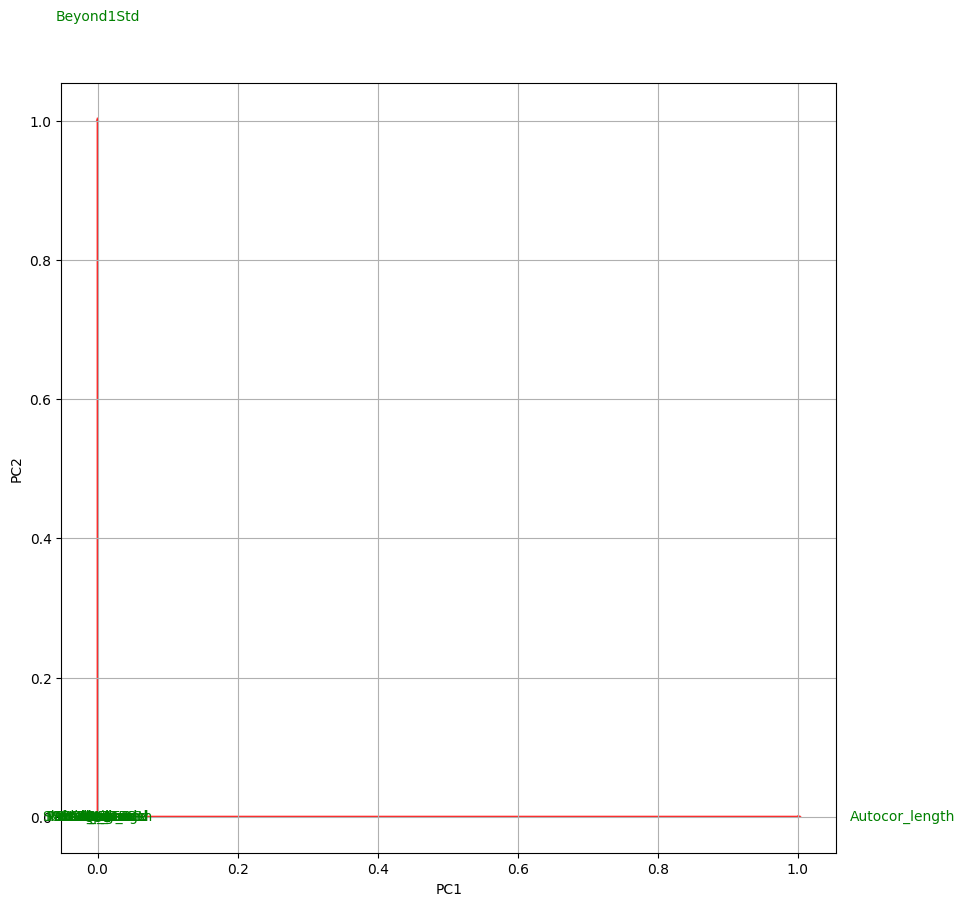

['Autocor_length', 'Beyond1Std', 'CAR_sigma', 'CAR_mean', 'CAR_tau', 'Con', 'LinearTrend', 'Mean', 'Meanvariance', 'MedianAbsDev', 'MedianBRP', 'PairSlopeTrend', 'Q31', 'Rcs', 'Skew', 'SlottedA_length', 'SmallKurtosis', 'Std', 'StetsonK_AC']


In [ ]:
def myplot(score, coeff, labels=None):
        xs = score[:,0]
        ys = score[:,1]
        n = coeff.shape[0]
        scalex = 1.0/(xs.max() - xs.min())
        scaley = 1.0/(ys.max() - ys.min())
        plt.scatter(xs*scalex, ys*scaley, c ='b' , alpha =0.3, s =2)
        for i in range(n):
                plt.arrow(0,0, coeff[i,0], coeff[i,1], color = 'r', alpha =0.7)
                if labels is None:
                        plt.text(coeff[i,0]*1.15, coeff[i,1] *1.15, "Var"+str(i+1), color="hotpink", ha = 'center', va = 'center')
                else:
                        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
fig = plt.figure(figsize=(10,10))
#plt.xlim(-0.1,0.1)
#plt.ylim(-0.1, 0.1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()
myplot(principalComponents[:,0:2],np.transpose(pca.components_[0:2, :]), labels=features)
plt.show()
print(features)